Prompt 1 (en caso de ser necesario): Genera una metodolog√≠a general, pero efectiva y con rigor para aplicar correctamente X

Prompt 2: Genera un ejercicio para aplicar X. Las caracter√≠sticas del ejercicio son:

- No pongas objetivos muy extensos (considera que el ejercicio debe de ser did√°ctico y enfocado en aplicar la t√©cnica correspondiente)
- Genera el enunciado correspondiente con los entregables esperados
- Dame la soluci√≥n conceptual o en c√≥digo seg√∫n sea el caso. La soluci√≥n en c√≥digo debe estar en una sola celda y organizada





Estructura del trabajo:

Cada subtema tiene una breve descripci√≥n o recordatorio del funcionamiento de la t√©cnica y enseguida se hace un ejercicio de aplicaci√≥n (no todos tienen ejercicio y o explicaci√≥n)

# 1.- Medir el sobreajuste e infrajuste 



## Explicaci√≥n

Sabemos que entrenar un modelo de aprednizaje autom√°tico puede sufrir de sobreajuste y subajuste. Cunado decimos que un algoritmo aprende con un modelo matematico a traves de los datos en realidad se traduce simplemente a encontrar parametros o coeficientes de un modelo o estructura matematica (ya sea parametrico o no parametrico). Es decir, en el fondo se hace reduce a hacer un problema de optimizaci√≥n matematica.

- El sobreajuste se refiere a cuando un algor√≠tmo se ajusta tan bien a los datos que es incapaz de hacer buenas predicciones. An√°logo a cuando un estudiante memoriza un tema o proceso y en el examen no sabe que hacer con un ejercicio ligeramente diferente. 
    
Las formas de resolverlo son:

        - Disminuir la complejidad del modelo con regularizaci√≥n o utilizar un modelo m√°s robusto

- El subajuste es cuando un algoritmo no se logra ajustar a los datos

Las formas de resolverlo son:

        - Aumentar la complejidad del modelo o a√±adir m√°s datos o caracter√≠sticas 



Matem√°ticamente:

El error en ML se suele descomponer como:

$$\text{Error Total} = \text{Error de entrenamiento} + \text{Error de generalizaci√≥n}$$

de forma m√°s rigurosa:

$$\mathbb{E}[(\hat{f}(x) - f(x))^2] = \text{Sesgo}^2 + \text{Varianza} + \text{ruido irreducible}$$


- $\hat{f}(x) = \text{predicci√≥n del modelo}.$
- $f(x) = \text{relaci√≥n verdadera entre variables}.$
- E es el error esperado

En t√©rminos matem√°ticos y generales

- Sobreajuste = sesgo peque√±o, varianza grande. o bien error bajo en entrenamiento y alto en prueba

- Subajuste = sesgo grande, varianza peque√±a. o bien error alto en entrenamiento y alto en prueba



## Ejercicio 1

Una empresa desea predecir la cantidad de ventas mensuales (en miles de unidades) a partir del presupuesto en publicidad digital (en miles de d√≥lares). Te han proporcionado un conjunto de datos hist√≥ricos y desean que construyas un modelo que:

1. Analice si hay infraajuste, buen ajuste o sobreajuste seg√∫n el grado del polinomio utilizado.
2. Eval√∫e el desempe√±o del modelo en entrenamiento y prueba.
3. Grafique la relaci√≥n real y las curvas ajustadas para distintos grados polin√≥micos.

Objetivos / Entregables esperados:

- Entrenar tres modelos de regresi√≥n polin√≥mica: grados 1 (lineal), 2 y 10.

- Calcular el error MSE (Error Cuadr√°tico Medio) en entrenamiento y prueba.

- Interpretar los resultados: ¬øQu√© modelo tiene sobreajuste? ¬øCu√°l infraajuste?

- Graficar los tres modelos sobre los datos reales.

In [ ]:
#data
import numpy as np       # Importa NumPy, una biblioteca para c√°lculos num√©ricos eficientes, ¬°piensa en ella como una calculadora gigante para arreglos!
import pandas as pd      # Importa Pandas, una biblioteca para manejar y analizar datos en tablas, ¬°como hojas de c√°lculo en Python!
import matplotlib.pyplot as plt # Importa Matplotlib para crear gr√°ficos y visualizaciones, ¬°perfecto para dibujar lo que representan tus datos!

# Semilla para reproducibilidad
np.random.seed(42)       # Fija la "semilla" para los n√∫meros aleatorios, ¬°as√≠ siempre obtendr√°s los mismos resultados aleatorios cada vez que ejecutes el c√≥digo!

# Generar datos ficticios
X = np.linspace(0, 10, 30) # Crea un conjunto de 30 n√∫meros espaciados uniformemente entre 0 y 10, ¬°estos ser√°n nuestros datos de "publicidad"!
y = 3*X**2 - 2*X + 5 + np.random.normal(0, 10, size=X.shape) # Calcula los "ingresos" (y) usando una f√≥rmula basada en "publicidad" (X) y a√±ade un poco de "ruido" aleatorio para que se vea m√°s real.

data = pd.DataFrame({'Publicidad': X, 'Ventas': y}) # Combina nuestros datos de "publicidad" (X) y "ventas" (y) en una tabla de Pandas, ¬°como organizar tus datos en columnas con nombres!
data.to_csv("ventas_publicidad.csv", index=False) # Guarda esta tabla de datos en un archivo CSV llamado "ventas_publicidad.csv" sin a√±adir un √≠ndice de fila, ¬°para que puedas usarla m√°s tarde en otros programas!

c:\Users\Fernando\anaconda3\envs\Mipentorno\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\Fernando\anaconda3\envs\Mipentorno\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Users\Fernando\anaconda3\envs\Mipentorno\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


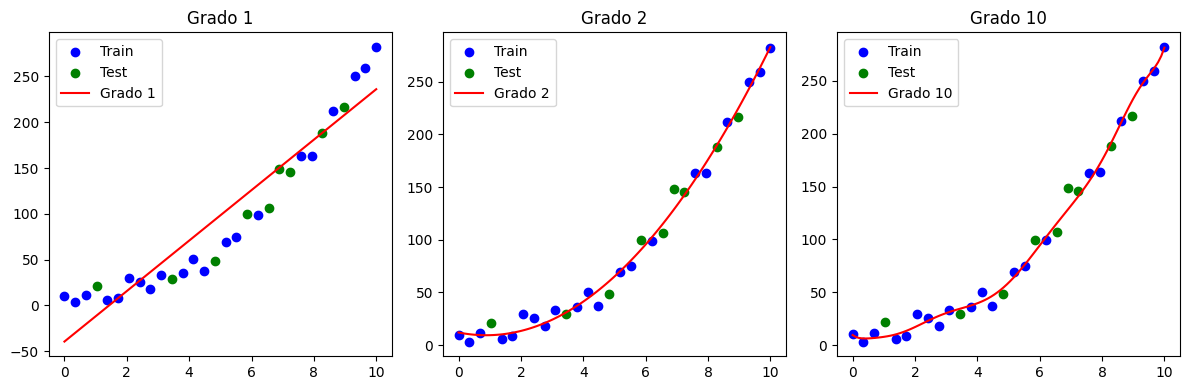

Grado 1 ‚Üí MSE train: 822.22, MSE test: 646.23
Grado 2 ‚Üí MSE train: 46.49, MSE test: 103.20
Grado 10 ‚Üí MSE train: 31.97, MSE test: 121.87


In [2]:
#solucion
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Cargar datos
X = data[['Publicidad']]
y = data['Ventas']

# Divisi√≥n entrenamiento/prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Lista de grados a probar
grados = [1, 2, 10]

# Almacenar errores
errores = []

# Gr√°fico
plt.figure(figsize=(12, 4))

for i, grado in enumerate(grados, 1):
    poly = PolynomialFeatures(degree=grado)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    y_pred_train = model.predict(X_poly_train)
    y_pred_test = model.predict(X_poly_test)

    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)

    errores.append((grado, mse_train, mse_test))

    # Plot
    plt.subplot(1, 3, i)
    plt.scatter(X_train, y_train, color='blue', label='Train')
    plt.scatter(X_test, y_test, color='green', label='Test')

    X_plot = np.linspace(0, 10, 100).reshape(-1, 1)
    X_plot_poly = poly.transform(X_plot)
    y_plot = model.predict(X_plot_poly)

    plt.plot(X_plot, y_plot, color='red', label=f"Grado {grado}")
    plt.title(f"Grado {grado}")
    plt.legend()

plt.tight_layout()
plt.show()

# Mostrar errores
for g, e_tr, e_te in errores:
    print(f"Grado {g} ‚Üí MSE train: {e_tr:.2f}, MSE test: {e_te:.2f}")


El principio que debemos seguir para medir el sobreajuste y subajuste es: 

- Si el error en entrenamiento es bajo, pero en prueba es alto, hay sobreajuste (overfitting).

- Si el error en entrenamiento es alto y tambi√©n es alto en prueba, hay subajuste (underfitting).

- Si el error es bajo y similar en ambos conjuntos (entrenamiento y prueba), no hay sobreajuste ni subajuste; el modelo generaliza bien.

- En el gr√°fico 1 podemos observar un subajuste
- En el gr√°fico 2 podemos observar que no hay ni sobre ajuste ni sub ajuste
- En el gr√°fico 3 podemos observar un sobreajuste

Aqu√≠ podemos concluir que el modelo con 2 grados es el √≥ptimo

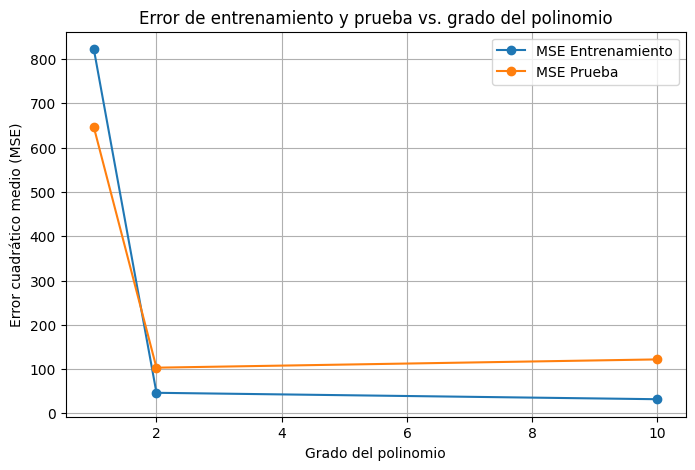

In [3]:
# Crear listas para los grados y los errores
grados = [g for g, _, _ in errores]
mse_train = [e_tr for _, e_tr, _ in errores]
mse_test = [e_te for _, _, e_te in errores]

plt.figure(figsize=(8,5))
plt.plot(grados, mse_train, marker='o', label='MSE Entrenamiento')
plt.plot(grados, mse_test, marker='o', label='MSE Prueba')
plt.xlabel('Grado del polinomio')
plt.ylabel('Error cuadr√°tico medio (MSE)')
plt.title('Error de entrenamiento y prueba vs. grado del polinomio')
plt.legend()
plt.grid(True)
plt.show()

# 2.- Validaci√≥n cruzada con k folds

## Explicaci√≥n

Funcionamiento:

- Dividir el dataset en k folds de tama√±o aproximadamente igual (dividirlo en k muestras iguales aproximadamente). 

- Para cada fold:

a. Tomar ese fold como conjunto de prueba.

b. Tomar los k-1 folds restantes como conjunto de entrenamiento.

c. Entrenar el modelo con el conjunto de entrenamiento.

d. Evaluar el modelo con el conjunto de prueba y guardar la m√©trica.

- Repetir el paso 2 para los k folds (entrenar k veces el mismo conjunto de datos tomando una muestra diferente tanto de test como de entrenamiento)

- Calcular la media de las m√©tricas de las k iteraciones para obtener la evaluaci√≥n final.

En resumen, dividimos el conjunto de datos en k folds y entrenamos k veces el conjunto de datos con una muestra diferente de test para evaluarlo.

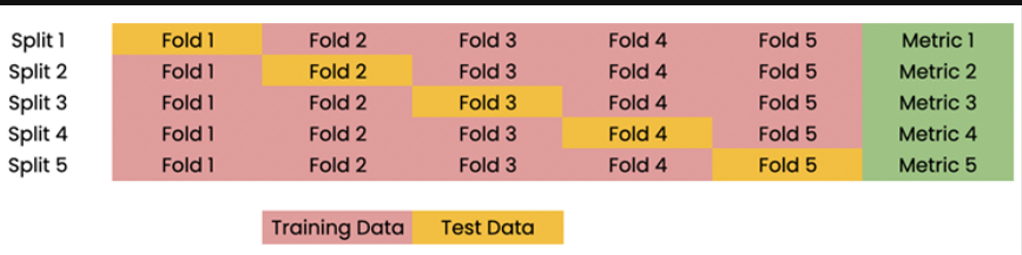

## Ejercicio 1

Tienes un conjunto de datos ficticios con informaci√≥n de clientes, donde se desea predecir si no van a pagar (1) o si (0), en funci√≥n de variables num√©ricas.

Tu tarea es:

- Aplicar validaci√≥n cruzada con 5 particiones (5-fold cross-validation) usando un modelo de clasificaci√≥n.

- Mostrar los resultados obtenidos para cada fold (accuracy).

- Calcular y reportar el promedio de accuracy y su desviaci√≥n est√°ndar.

- Comparar los resultados con una √∫nica partici√≥n de train/test tradicional (por ejemplo, 70/30) y discutir la diferencia.

In [1]:
import pandas as pd
data = pd.read_csv("df_encoded.csv")
X = data.drop('loan_status', axis=1)
y = data['loan_status']


In [7]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1. datos
data = pd.read_csv("df_encoded.csv")
X = data.drop('loan_status', axis=1)
y = data['loan_status']

# 2. Crear modelo
model = KNeighborsClassifier(n_neighbors=3)

# 3. Validaci√≥n cruzada con 5 folds
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

print("Accuracy por fold:", scores)
print("Accuracy promedio:", scores.mean())
print("Desviaci√≥n est√°ndar:", scores.std())

# 4. Comparaci√≥n con train/test tradicional
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc_simple = accuracy_score(y_test, y_pred)

print("Accuracy con partici√≥n 70/30:", acc_simple)


Accuracy por fold: [0.82369188 0.82412523 0.8271946  0.83072437 0.81660528]
Accuracy promedio: 0.8244682721951268
Desviaci√≥n est√°ndar: 0.0046715893835337
Accuracy con partici√≥n 70/30: 0.8212787723785167


- Accuracy por fold: 

Es el la precision global de cada uno de los 5 folds


- Accuracy promedio: 0.825

es el promedio de las 5 precisiones previas: suma de las 5 precisiones/5



- Desviaci√≥n est√°ndar: 0.0427

variacion respecto a la media (varia muy poco, tiene poca variabilidad)



- Accuracy con partici√≥n 70/30: 

creamos un modelo aparte con una division de 70-30 y comparamos el resultado obtenido por las validacion cruzada:

    - La validcion cruzada: 0.824
    - El modelo con 70-30: 0.821







| Resultado de CV vs Split √∫nico        | Interpretaci√≥n                                                                                                                 |
| ------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------ |
| **Similares (como en tu caso)**       | Modelo robusto, buen sesgo-varianza. El modelo generaliza bien y no depende de un solo split.                                  |
| **CV ‚â´ Split √∫nico**                  | El modelo puede haber tenido mala suerte en ese 30% de prueba. Tal vez se enfrent√≥ a datos m√°s dif√≠ciles o no representativos. |
| **CV ‚â™ Split √∫nico**                  | Es posible que el split √∫nico haya sido afortunado (por casualidad). El modelo podr√≠a estar sobreajustando a esa partici√≥n.    |
| **Diferencia muy alta (¬±0.05 o m√°s)** | Probablemente haya alta varianza en los datos. Requiere revisar el modelo o hacer m√°s pruebas.                                 |




Conf√≠a m√°s en la validaci√≥n cruzada, porque:

- Promedia el rendimiento sobre varios splits.

- Reduce el sesgo de una sola partici√≥n.

- Es una estimaci√≥n m√°s estable y realista del rendimiento en datos no vistos.

# 3.- Leave-One-Out Cross Validation

## Explicaci√≥n

El funcionamiento es:

- Para un dataset con n observaciones:

a. Tomar 1 observaci√≥n como conjunto de prueba.

b. Tomar las n-1 observaciones restantes como conjunto de entrenamiento.

c. Entrenar el modelo con las n-1 observaciones.

d. Evaluar el modelo con la observaci√≥n de prueba y guardar la m√©trica.


- Repetir el paso 1 para cada una de las n observaciones.

- Calcular la media de las m√©tricas de las n iteraciones para obtener la evaluaci√≥n final.

## Ejercicio 1

Se te proporciona un peque√±o conjunto de datos sint√©ticos con 10 observaciones que relacionan el n√∫mero de horas estudiadas (horas_estudio) con la calificaci√≥n obtenida (calificacion). 
Tu tarea es usar LOOCV para estimar el error de generalizaci√≥n de un modelo de regresi√≥n lineal simple que predice la calificaci√≥n a partir de las horas de estudio.

- C√≥digo que implemente Leave-One-Out Cross Validation desde cero (sin usar cross_val_score).

- C√°lculo del error cuadr√°tico medio (MSE) promedio obtenido por LOOCV.

- An√°lisis: ¬øQu√© ventaja ofrece LOOCV frente a una validaci√≥n tradicional con train/test split en un conjunto tan peque√±o?



In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Datos
X = np.array([1,2,3,4,5,6,7,8,9,10]).reshape(-1, 1)
y = np.array([2,4,1,8,7,12,9,13,14,15])

n = len(X)
errors = []

for i in range(n):
    # Separar datos de entrenamiento y prueba
    X_train = np.delete(X, i, axis=0)
    y_train = np.delete(y, i, axis=0)
    X_test = X[i].reshape(1, -1)
    y_test = y[i]
    
    # Modelo
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predicci√≥n y error
    y_pred = model.predict(X_test)
    error = mean_squared_error([y_test], y_pred)
    errors.append(error)

# MSE promedio
loocv_mse = np.mean(errors)
print(f"Error cuadr√°tico medio (LOOCV): {loocv_mse:.4f}")


Error cuadr√°tico medio (LOOCV): 4.1085


# 4.- Stratified K-Fold

## Explicaci√≥n

- Dividir el dataset en k folds, asegurando que la proporci√≥n de cada clase sea igual en todos los folds.

- Para cada fold:
a. Tomar ese fold como conjunto de prueba.
b. Tomar los k-1 folds restantes como conjunto de entrenamiento.
c. Entrenar el modelo con el conjunto de entrenamiento.
d. Evaluar el modelo con el conjunto de prueba y guardar la m√©trica.

- Repetir el paso 2 para los k folds.

- Calcular la media de las m√©tricas de las k iteraciones para obtener la evaluaci√≥n final.

"Es lo mismo que k-fold CV, pero ponderando proporcionalmente las clased"

Esto es especialmente √∫til en problemas de clasificaci√≥n con clases desbalanceadas, donde algunas clases tienen muy pocas muestras.

Supongamos un dataset con 10 muestras:

Clase A: 6 muestras

Clase B: 4 muestras

Queremos k = 2 folds:

- Fold 1 ‚Üí 3 muestras A + 2 muestras B

- Fold 2 ‚Üí 3 muestras A + 2 muestras B

Cada fold tiene la misma proporci√≥n de clases que el dataset original: 60% A y 40% B.

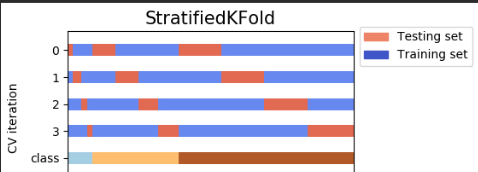

## Ejercicio 1

Se proporciona un conjunto de datos sint√©tico que relaciona caracter√≠sticas de estudiantes con su rendimiento final (aprob√≥ o no aprob√≥). Se desea predecir si un estudiante aprobar√° o no con base en el n√∫mero de horas que estudia. 0 = No aprob√≥, 1 = Aprob√≥

- Implementaci√≥n de Stratified K-Fold Cross Validation con K=5.

- Entrenamiento de un modelo de clasificaci√≥n (por ejemplo, regresi√≥n log√≠stica).

- C√°lculo del accuracy promedio.

- Comparaci√≥n breve con una validaci√≥n cruzada sin estratificar: ¬øpor qu√© podr√≠a ser menos confiable en este caso?

In [2]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

# Datos
X = np.array([1,2,3,4,5,6,7,8,9,10]).reshape(-1, 1)
y = np.array([0,0,0,1,0,1,1,1,1,1])

# Modelo
model = LogisticRegression()

# Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracies = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Resultados
print(f"Accuracy promedio (Stratified 5-Fold): {np.mean(accuracies):.4f}")


Accuracy promedio (Stratified 5-Fold): 0.8000


c:\Users\Fernando\anaconda3\envs\Mipentorno\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Usar Stratified K-Fold es √∫til porque asegura que cada subconjunto tenga representadas ambas clases (aprob√≥/no aprob√≥) de manera proporcional. Esto mejora la estabilidad del rendimiento medido, especialmente en conjuntos peque√±os o desbalanceados.

Si us√°ramos un K-Fold normal, podr√≠amos tener folds sin representantes de alguna clase, lo que sesgar√≠a el entrenamiento o inflar√≠a artificialmente la m√©trica.

Resumen

| T√©cnica                 | C√≥mo funciona                                                                                                                   | Ventajas                                                                                       | Desventajas                                                                                                       | Cu√°ndo aplicarla                                                                                                                        |
| ----------------------- | ------------------------------------------------------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------- |
| **K-Fold CV**           | Divide el dataset en k folds; cada fold se usa una vez como prueba y los dem√°s como entrenamiento.                              | Buena estimaci√≥n de error, balance entre entrenamiento y prueba, eficiente computacionalmente. | Sensible a la distribuci√≥n de datos en los folds.                                                                 | Dataset de tama√±o moderado o grande, clasificaci√≥n o regresi√≥n est√°ndar, cuando no hay clases desbalanceadas extremas.                  |
| **Leave-One-Out (LOO)** | Cada observaci√≥n se usa una vez como prueba y el resto como entrenamiento; se entrenan n modelos (n = n√∫mero de observaciones). | Usa toda la informaci√≥n disponible para entrenamiento; menos sesgo de estimaci√≥n.              | Muy costoso computacionalmente, especialmente para datasets grandes; puede aumentar la varianza de la estimaci√≥n. | Dataset muy peque√±o, cuando cada observaci√≥n es valiosa y se quiere maximizar el uso de datos para entrenamiento.                       |
| **Stratified K-Fold**   | Igual que K-Fold, pero mantiene la proporci√≥n de clases en cada fold.                                                           | Evita sesgo en datasets desbalanceados; mejor estimaci√≥n de m√©tricas de clasificaci√≥n.         | M√°s complejo de implementar que K-Fold est√°ndar.                                                                  | Problemas de **clasificaci√≥n con clases desbalanceadas**, donde es importante que cada fold refleje la distribuci√≥n de clases original. |


# 5.- Regularizaci√≥n

## Explicaci√≥n

La regularizaci√≥n en Machine Learning es una t√©cnica que se usa para evitar el sobreajuste (overfitting) en los modelos.

Matem√°ticamente la regularizaci√≥n agrega un t√©rmino de penalizaci√≥n al funci√≥n de p√©rdida del modelo para limitar la complejidad

Funci√≥n de p√©rdida regularizada = Funci√≥n de p√©rdida original + $\lambda$ ¬∑ Complejidad del modelo

Donde:

- $\lambda$ es un par√°metro que controla cu√°nto queremos penalizar la complejidad.
- La complejidad se puede medir de diferentes maneras:
  - Ridge (L2): Complejidad = $\sum_j w_j^2$
  - Lasso (L1): Complejidad = $\sum_j |w_j|$


  En otras palabras, la regularizaci√≥n fuerza a que los coeficientes $w_j$ del modelo no sean demasiado grandes, evitando que el modelo ‚Äúmemorice‚Äù el ruido de los datos de entrenamiento.


En conclusi√≥n: podemos decir que la regularizaci√≥n simplifica la complejidad de un modelo y en algunos caso hace selecci√≥n de caracteristicas por nosotros. Y matematicamente significa modificar la funcion de costes del modelo implementado. 

Nota: La modificaci√≥n se hace sobre la funci√≥n de costes, no sobre el modelo

Una metodologia para aplicar regularizacion:

https://chatgpt.com/share/6887da8f-bdf8-800a-ac61-cea666976322

## Ejercicio 1

Se te proporciona un conjunto de datos sint√©tico generado con scikit-learn, el cual contiene 100 muestras y 30 variables predictoras. Solo 5 de estas variables influyen realmente en la variable objetivo, el resto son ruido.

Tu tarea es:

- Ajustar un modelo de regresi√≥n lineal sin regularizaci√≥n y evaluar su rendimiento.

- Ajustar un modelo Ridge (L2) y comparar sus resultados con el modelo sin regularizaci√≥n.

- Ajustar un modelo Lasso (L1) y observar qu√© coeficientes son reducidos a cero.

- Ajustar un modelo Elastic Net y usar validaci√≥n cruzada para encontrar la mejor combinaci√≥n de hiperpar√°metros alpha y l1_ratio.

- Comparar los errores (MSE) y los coeficientes obtenidos en cada caso.

- Concluir cu√°l es el modelo m√°s adecuado para este tipo de problema y justificarlo.

üì¶ Entregables esperados

- Notebook o archivo .py con el c√≥digo.

- Comentarios explicativos paso a paso.

- Tabla con los errores de validaci√≥n (MSE o RMSE) de cada modelo.

- Gr√°fica de comparaci√≥n de coeficientes.

- Conclusi√≥n escrita en m√°ximo 10 l√≠neas justificando qu√© t√©cnica funcion√≥ mejor y por qu√©.

In [1]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1. Generaci√≥n de datos sint√©ticos
X, y, coef = make_regression(n_samples=100, n_features=30, n_informative=5,
                             noise=10, coef=True, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Modelo sin regularizaci√≥n
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)

# 3. Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# 4. Lasso
lasso = Lasso(alpha=10)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# 5. Elastic Net con b√∫squeda de hiperpar√°metros
param_grid = {
    'alpha': [0.01, 0.1, 1.0],
    'l1_ratio': [0.2, 0.5, 0.8]
}
elastic = ElasticNet(max_iter=10000)
grid = GridSearchCV(elastic, param_grid, scoring='neg_mean_squared_error', cv=5)
grid.fit(X_train, y_train)
best_elastic = grid.best_estimator_
y_pred_elastic = best_elastic.predict(X_test)
mse_elastic = mean_squared_error(y_test, y_pred_elastic)

# 6. Comparaci√≥n
print("Errores de prueba:")
print(f"Lineal sin regularizaci√≥n: {mse_lr:.2f}")
print(f"Ridge: {mse_ridge:.2f}")
print(f"Lasso: {mse_lasso:.2f}")
print(f"Elastic Net: {mse_elastic:.2f}")

# 7. Gr√°fica de coeficientes
plt.figure(figsize=(10,6))
plt.plot(lr.coef_, 'o-', label='Linear')
plt.plot(ridge.coef_, 'o-', label='Ridge')
plt.plot(lasso.coef_, 'o-', label='Lasso')
plt.plot(best_elastic.coef_, 'o-', label='ElasticNet')
plt.legend()
plt.title('Comparaci√≥n de coeficientes por modelo')
plt.xlabel('√çndice del coeficiente')
plt.ylabel('Valor del coeficiente')
plt.grid(True)
plt.show()


Errores de prueba:
Lineal sin regularizaci√≥n: 292.30
Ridge: 345.70
Lasso: 798.30
Elastic Net: 294.25


Tambi√©n podemos observar que de las 30 caracter√≠sticas son los 5 de √©stas son realmente relevantes.

# 6.- Matriz de confusi√≥n

## Explicaci√≥n

La matriz de confusi√≥n es una herramienta para evaluar el comportamiento y rendimiento de clases en un clasificador. Aqu√≠ dar√© la explicaci√≥n de dos clases, pero se puede extrapolar a varias clase

Tenemos dos clases, clase positiva: 1 y clase negativa: 0. La elecci√≥n de 0 y 1 es arbitraria, pero usualmente le damos el valor 1 a la positiva y cero a la negativa

Un modelo predice si un paciente tiene c√°ncer (1) o no (0).
$$
\begin{array}{|c|c|c|}
\hline
\text{REAL/PREDICHO} & \text{Prediccion positiva} & \text{Prediccion negativa} \\
\hline
\text{Clase positiva (1)} & \text{Verdaderos positivos TP} & \text{Falsos negativos FN} \\
\hline
\text{Clase negativa (0)} & \text{Falsos positivos FP} & \text{Verdaderos negativos TN} \\
\hline
\end{array}
$$


- Interpretaci√≥n de las celdas:

        - TP verdaderos positivos: aquellas observaciones que son positivas y el modelo predijo como positivas (casos de √©xito)
        - TN verdaderos negativos: aquellas observaciones que son negativas y se predijeron como negativas (casos de exito)
        - FN falsos negativos: aquellas observaciones que son positivas y se predijeron como negativas (casos de error) ERROR TIPO 2
        - FP falsos positivos: aquellas observaciones negativas que se predijeron como positivas (casos de error) ERROR TIPO 1



Se definen 4 m√©tricas principales. Estas m√©tricas se calculan para cada clase (en este caso solo para la clase 1 y cero)

- Precision global: Es el numero de predicciones correctas entre el numero de predicciones totales  TP+TN / TP+TN+FN+FP

Clase positiva:

- Precision de clase: TP / TP+FP

- Rcall o sensibilidad: TP / TP+FN

- F1 score:  Para este en realidad es $F_n$, en este cado es n=1

    $$
    F1 = 2 \cdot \frac{\frac{TP}{TP+FP} \cdot \frac{TP}{TP+FN}}{\frac{TP}{TP+FP} + \frac{TP}{TP+FN}}
    $$

    $$
    F1 = 2 \cdot \frac{Precision_{1} \cdot Recall_{1}}{Precision_{1} + Recall_{1}}
    $$


Clase negativa: 

- Precision de clase: TN / TN + FN

- Rcall o sensibilidad: TN / TN + FP

- F1 score:Para este en realidad es $F_n$, en este cado es n=1


    $$
    F1 = 2 \cdot \frac{\frac{TN}{TN+FN} \cdot \frac{TN}{TN+FP}}{\frac{TN}{TN+FN} + \frac{TN}{TN+FP}}
    $$

    $$
    F1 = 2 \cdot \frac{Precision_{0} \cdot Recall_{0}}{Precision_{0} + Recall_{0}}
    $$

Nota para f1 socre:
Tomemos la clase 1 como ejemplo y veamos la f√≥rmula general y el comportamiento de $F_\beta$ score

$$
F_{\beta,1} = (1 + \beta^2) \cdot \frac{Precision_{1} \cdot Recall_{1}}{(\beta^2 \cdot Precision_{1}) + Recall_{1}}
$$


Tomemos valores de $F_{0.5,1,2}$

‚Üí da m√°s peso a la Precisi√≥n

$$
F_{0.5,1} = 1.25 \cdot \frac{Precision_{1} \cdot Recall_{1}}{0.25 \cdot Precision_{1} + Recall_{1}}
$$


‚Üí balancea precisi√≥n y recall por igual (es el F1-score normal)

$$
F_{1,1} = 2 \cdot \frac{Precision_{1} \cdot Recall_{1}}{Precision_{1} + Recall_{1}}
$$


‚Üída m√°s peso al Recall

$$
F_{2,1} = 5 \cdot \frac{Precision_{1} \cdot Recall_{1}}{4 \cdot Precision_{1} + Recall_{1}}
$$


Analogamente con la clase cero

## Ejercicio 1

Se te han proporcionado los resultados de cinco modelos de clasificaci√≥n, ya entrenados y evaluados en distintos sectores. Cada modelo ha generado una matriz de confusi√≥n.

Entregables esperados para cada caso:

1. Interpretaci√≥n de la matriz:

    - ¬øQu√© representa cada celda?

    - ¬øCu√°l es la clase positiva?

    - ¬øQu√© error es m√°s grave en este contexto?

2. C√°lculo e interpretaci√≥n de m√©tricas:

    - ccuracy, Precision, Recall, F1-score (para la clase positiva).

    - Justificaci√≥n del mejor modelo en funci√≥n del contexto (costos, prioridades, riesgos) y las mejoras a realizar.



#### Caso 1 Detecci√≥n de c√°ncer. 

Un modelo predice si un paciente tiene c√°ncer (1) o no (0).
$$
\begin{array}{|c|c|c|}
\hline
\text{REAL/PREDICHO} & \text{Prediccion positiva} & \text{Prediccion negativa} \\
\hline
\text{Clase positiva (1)} & \text{Verdaderos positivos TP} & \text{Falsos negativos FN} \\
\hline
\text{Clase negativa (0)} & \text{Falsos positivos FP} & \text{Verdaderos negativos TN} \\
\hline
\end{array}
$$


$$
\begin{array}{|c|c|c|}
\hline
\text{REAL/PREDICHO} & \text{Prediccion positiva} & \text{Prediccion negativa} \\
\hline
\text{Clase positiva (1)} & \text{20} & \text{5} \\
\hline
\text{Clase negativa (0)} & \text{10} & \text{85} \\
\hline
\end{array}
$$

1. 

- La clase positiva en "si tiene cancer"
- La clase negativa: "No tiene c√°ncer"


- Interpretaci√≥n de las celdas:

        - TP verdaderos positivos: aquellos que tienen c√°ncer y el modelo predijo que efectivamente tenia cancer (aciertos)
        - TN verdaderos negativos: aquellos que no tienen cancer y se predijeron que efectivamente no tenias cancer (aciertos)
        - FN falsos negativos: aquellos que se predijeron como que no tiene cancer y en realidad si tienen cancer  (casos de error) ERROR TIPO 2  "predice no positivo, cuando es si positivo"
        - FP falsos positivos: aquellos que se predijeron como que si tienen cancer y en realidad no tienen cacner  (casos de error) ERROR TIPO 1 "predice si positivo, cuando es no positivo"


El error m√°s grave en este contexto es decirle a un paciente que no tiene c√°ncer cuando si lo tiene (error tipo 2). 

2. 

C√°lculo para la clase positiva (lo mismo se puede hacer con la negativa con sus respectivas f√≥rmulas):

| M√©trica de la clase 1     | Valor | Interpretaci√≥n corregida                                                                                                                                                                            |
| ------------------------- | ----- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Accuracy**              | 0.875 | Del total de predicciones (positivas y negativas), el modelo acierta correctamente en el **87.5% de los casos**. No distingue entre clases, mide la proporci√≥n global de aciertos.                  |
| **Precision**             | 0.667 | De todas las predicciones que el modelo hizo como *positivas* ("tiene c√°ncer"), el **66.7% realmente eran positivas**. Es decir, mide cu√°ntos de los detectados como enfermos en verdad lo estaban. |
| **Recall (Sensibilidad)** | 0.8   | De todas las personas que **realmente ten√≠an c√°ncer**, el modelo identific√≥ correctamente al **80%**.                                                                                               |
| **F1 Score**              | 0.727 | Es el promedio arm√≥nico entre precisi√≥n y recall, y en este caso indica un **balance del 72.7% entre identificar correctamente enfermos y no generar demasiados falsos positivos (aquellos que se predicen positivos cuando en realidad son negativos)**.                 |




- Se debe buscar minimizar los falsos negativos, o equivalentemente, mejorar la sensibilidad de la clase 1 (aumentarla) y contrastarla de forma correcta con la precisi√≥n (tener el trade off √≥ptimo):

$Rcall_{clasepositiva} = \frac{TP}{TP + FN}$

- A medida que diminuye FN, Rcall se hace m√°s grande. Esto se interpreta como que debemos capturar a la mayor parte de verdaderos positivos aunque perdamos algunos verdaderos negativos.

- Es mejor menos riesgoso decirle a alguien que no tiene cancer cuando en realidad si lo tiene que decirle que si lo tiene cuando en realidad no lo tiene












#### Caso 2: Finanzas ‚Äì Predicci√≥n de Morosos 

Modelo que predice si un cliente incumplir√° su deuda (1) o no (0).

$$
\begin{array}{|c|c|c|}
\hline
\text{REAL/PREDICHO} & \text{Prediccion positiva} & \text{Prediccion negativa} \\
\hline
\text{Clase positiva (1)} & \text{Verdaderos positivos TP} & \text{Falsos negativos FN} \\
\hline
\text{Clase negativa (0)} & \text{Falsos positivos FP} & \text{Verdaderos negativos TN} \\
\hline
\end{array}
$$

$$
\begin{array}{|c|c|c|}
\hline
\text{REAL/PREDICHO} & \text{Prediccion positiva} & \text{Prediccion negativa} \\
\hline
\text{Clase positiva (1)} & 70 & 30 \\
\hline
\text{Clase negativa (0)} & 20 & 180 \\
\hline
\end{array}
$$


1. 

- La clase positiva en "es moroso"
- La clase negativa: "si cumple"


- Interpretaci√≥n de las celdas:

        - TP verdaderos positivos: aquellos que son morosos (no pagan) y el modelo predijo que efectivamente no pagan (aciertos)
        - TN verdaderos negativos: aquellos que no son morosos (si pagan) y se predijeron que efectivamente si pagan (aciertos)
        - FN falsos negativos: aquellos que se predijeron como que no son morosos (si cumplen) y en realidad son morosos  (casos de error) ERROR TIPO 2  "predice no positivo, cuando es si positivo"
        - FP falsos positivos: aquellos que se predijeron como que si son morosos (no cumplen) y en realidad no son morosos (si cumplen)  (casos de error) ERROR TIPO 1 "predice si positivo, cuando es no positivo"


El error m√°s grave en este contexto es considerar a los morosos como no morosos (error tipo 2). Pero tambi√©n debemos de contrastar la p√©rdida que supone considerar a los que no son morosos como morosos (error tipo 1)

2. 

C√°lculo para la clase positiva (lo mismo se puede hacer con la negativa con sus respectivas f√≥rmulas):

| M√©trica de la clase 1     | Valor | Interpretaci√≥n corregida                                                                                                                                                                                                                                 |
| ------------------------- | ----- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Accuracy**              | 0.833 | Del total de predicciones (positivas y negativas), el modelo acierta correctamente en el **83.3% de los casos**. No distingue entre clases, mide la proporci√≥n global de aciertos.                                                                       |
| **Precision**             | 0.778 | De todas las predicciones que el modelo hizo como *positivas* ("es moroso"), el **77.8% realmente eran positivas**. Es decir, mide cu√°ntos de los detectados como morosos en verdad lo son.                                                              |
| **Recall (Sensibilidad)** | 0.700 | De todas las personas que **realmente son morosos**, el modelo identific√≥ correctamente al **70%**.                                                                                                                                                      |
| **F1 Score**              | 0.737 | Es el promedio arm√≥nico entre precisi√≥n y recall, y en este caso indica un **balance del 73.7% entre identificar correctamente morosos y no generar demasiados falsos positivos (aquellos que se predicen positivos cuando en realidad son negativos)**. |





- Se debe buscar minimizar los falsos negativos, o equivalentemente, mejorar la sensibilidad de la clase 1 (aumentarla) y contrastarla de forma correcta con la precisi√≥n de la clase 2, pero se debe definir con el cliente qu√© es m√°s valioso: detectar a los morosos o priorizar a los no morosos (ya que ambos pueden representar p√©rdidas, pero hay que contrastar cu√°l representa mayor p√©rdida y apartir de ah√≠ empezar a mejorar el clasificador)




#### Caso 3: Log√≠stica ‚Äì Fallas de Entrega

Contexto: Se predice si una entrega llegar√° a tiempo (1) o tendr√° una falla (0).


$$
\begin{array}{|c|c|c|}
\hline
\text{REAL/PREDICHO} & \text{Prediccion positiva} & \text{Prediccion negativa} \\
\hline
\text{Clase positiva (1)} & \text{Verdaderos positivos TP} & \text{Falsos negativos FN} \\
\hline
\text{Clase negativa (0)} & \text{Falsos positivos FP} & \text{Verdaderos negativos TN} \\
\hline
\end{array}
$$

$$
\begin{array}{|c|c|c|}
\hline
\text{REAL/PREDICHO} & \text{Prediccion positiva} & \text{Prediccion negativa} \\
\hline
\text{Clase positiva (1)} & 5 & 25 \\
\hline
\text{Clase negativa (0)} & 30 & 140 \\
\hline
\end{array}
$$


- La clase positiva en "llega a tiempo"
- La clase negativa: "no llega a tiempo"

- Interpretaci√≥n de las celdas:

        - TP verdaderos positivos: aquellos que son morosos (no pagan) y el modelo predijo que efectivamente no pagan (aciertos)
        - TN verdaderos negativos: aquellos que no son morosos (si pagan) y se predijeron que efectivamente si pagan (aciertos)
        - FN falsos negativos: aquellos que se predijeron como que no son morosos (si cumplen) y en realidad son morosos  (casos de error) ERROR TIPO 2  "predice no positivo, cuando es si positivo"
        - FP falsos positivos: aquellos que se predijeron como que si son morosos (no cumplen) y en realidad no son morosos (si cumplen)  (casos de error) ERROR TIPO 1 "predice si positivo, cuando es no positivo"


El error m√°s grave en este contexto es considerar a los morosos como no morosos (error tipo 2). Pero tambi√©n debemos de contrastar la p√©rdida que supone considerar a los que no son morosos como morosos (error tipo 1)

2. 

C√°lculo para la clase positiva (lo mismo se puede hacer con la negativa con sus respectivas f√≥rmulas):

| M√©trica de la clase 1     | Valor | Interpretaci√≥n corregida                                                                                                                                                                                                                                 |
| ------------------------- | ----- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Accuracy**              | 0.833 | Del total de predicciones (positivas y negativas), el modelo acierta correctamente en el **83.3% de los casos**. No distingue entre clases, mide la proporci√≥n global de aciertos.                                                                       |
| **Precision**             | 0.778 | De todas las predicciones que el modelo hizo como *positivas* ("es moroso"), el **77.8% realmente eran positivas**. Es decir, mide cu√°ntos de los detectados como morosos en verdad lo son.                                                              |
| **Recall (Sensibilidad)** | 0.700 | De todas las personas que **realmente son morosos**, el modelo identific√≥ correctamente al **70%**.                                                                                                                                                      |
| **F1 Score**              | 0.737 | Es el promedio arm√≥nico entre precisi√≥n y recall, y en este caso indica un **balance del 73.7% entre identificar correctamente morosos y no generar demasiados falsos positivos (aquellos que se predicen positivos cuando en realidad son negativos)**. |





- Se debe buscar minimizar los falsos negativos, o equivalentemente, mejorar la sensibilidad de la clase 1 (aumentarla) y contrastarla de forma correcta con la precisi√≥n de la clase 2, pero se debe definir con el cliente qu√© es m√°s valioso: detectar a los morosos o priorizar a los no morosos (ya que ambos pueden representar p√©rdidas, pero hay que contrastar cu√°l representa mayor p√©rdida y apartir de ah√≠ empezar a mejorar el clasificador)


#### Caso 4: Tecnolog√≠a ‚Äì Cancelaci√≥n de Suscripciones


Contexto: Se predice si un usuario cancelar√° su suscripci√≥n (1) o la mantendr√° (0).



$$
\begin{array}{|c|c|c|}
\hline
\text{REAL/PREDICHO} & \text{Prediccion positiva} & \text{Prediccion negativa} \\
\hline
\text{Clase positiva (1)} & \text{Verdaderos positivos TP} & \text{Falsos negativos FN} \\
\hline
\text{Clase negativa (0)} & \text{Falsos positivos FP} & \text{Verdaderos negativos TN} \\
\hline
\end{array}
$$

$$
\begin{array}{|c|c|c|}
\hline
\text{REAL/PREDICHO} & \text{Prediccion positiva} & \text{Prediccion negativa} \\
\hline
\text{Clase positiva (1)} & 20 & 15 \\
\hline
\text{Clase negativa (0)} & 30 & 250 \\
\hline
\end{array}
$$


#### Caso 5: Educaci√≥n ‚Äì Deserci√≥n Estudiantil


Contexto: Se predice si un estudiante desertar√° del curso (1) o no (0).
$$
\begin{array}{|c|c|c|}
\hline
\text{REAL/PREDICHO} & \text{Prediccion positiva} & \text{Prediccion negativa} \\
\hline
\text{Clase positiva (1)} & \text{Verdaderos positivos TP} & \text{Falsos negativos FN} \\
\hline
\text{Clase negativa (0)} & \text{Falsos positivos FP} & \text{Verdaderos negativos TN} \\
\hline
\end{array}
$$

$$
\begin{array}{|c|c|c|}
\hline
\text{REAL/PREDICHO} & \text{Prediccion positiva} & \text{Prediccion negativa} \\
\hline
\text{Clase positiva (1)} & 30 & 40 \\
\hline
\text{Clase negativa (0)} & 10 & 160 \\
\hline
\end{array}
$$


# 7.- Reporte de clasificacion

## Explicaci√≥n

Es un resumen de las m√©tricas calculadas a partir de la matriz de confusi√≥n. Veamos un ejemplo concreto:

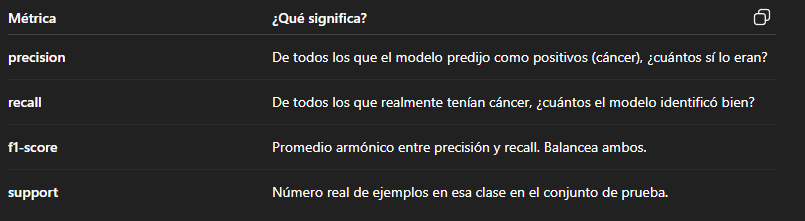

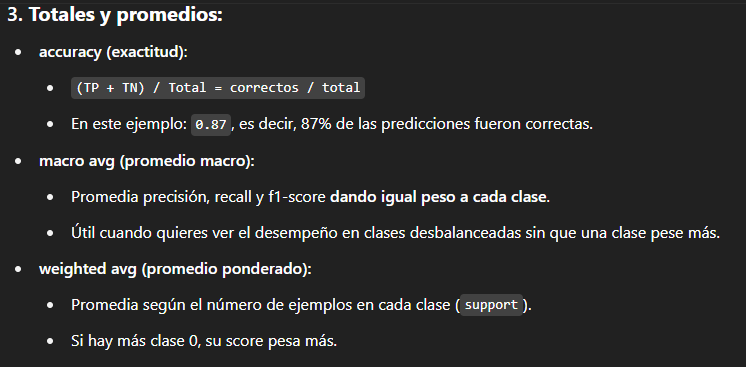

# 8.- Curva ROC y AUC

## Explicacion

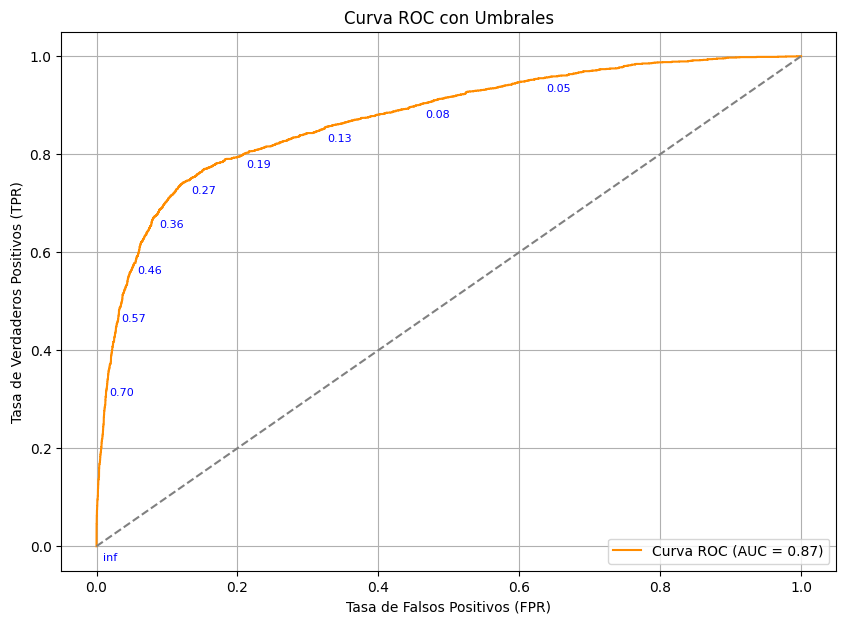

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

# Cargar datos
df_roc = pd.read_csv('df_encoded.csv')
X = df_roc.drop(columns='loan_status')
y = df_roc['loan_status']

# Divisi√≥n de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalamiento
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)     
X_test = scaler.transform(X_test)

# Entrenar modelo
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)

# Probabilidades y m√©tricas
y_proba = modelo.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

# Graficar curva ROC con umbrales anotados
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC con Umbrales')
plt.legend(loc='lower right')
plt.grid(True)

# Mostrar algunos umbrales como anotaciones
for i in range(0, len(thresholds), len(thresholds)//10):
    plt.annotate(f'{thresholds[i]:.2f}', 
                 (fpr[i], tpr[i]), 
                 textcoords="offset points", 
                 xytext=(10, -10),
                 ha='center',
                 fontsize=8,
                 color='blue')

plt.show()


Recordemos que en una matriz de confusi√≥n:
- TN: verdaderos negativos
- TP: verdaderos positivos
- FP: falsos positivos (ose clasifican como positivos cuando son negativos)
- FN: falsos negativos (se clasifican como negativas cuando son positivos)

Donde:
- tasa de falsos positivos = 1 - tasa de verdaderos negativos (especifidad)

La curva ROC es una grafica de rcall (tasa de verdaderos positivos) vs tasa de falsos positivos.



| Valor AUC     | Interpretaci√≥n                                         |
| ------------- | ------------------------------------------------------ |
| **1.0**       | Clasificaci√≥n perfecta (modelo ideal).                 |
| **0.9 ‚Äì 1.0** | Excelente capacidad de clasificaci√≥n.                  |
| **0.8 ‚Äì 0.9** | Muy buena.                                             |
| **0.7 ‚Äì 0.8** | Aceptable, buena.                                      |
| **0.6 ‚Äì 0.7** | D√©bil, bajo rendimiento.                               |
| **0.5 ‚Äì 0.6** | Pr√°cticamente aleatorio (similar a lanzar una moneda). |
| **0.5**       | Sin poder de discriminaci√≥n (no distingue clases).     |
| **< 0.5**     | Peor que aleatorio (el modelo podr√≠a estar invertido). |



üß† Interpretaci√≥n pr√°ctica:

El AUC representa la probabilidad de que el modelo asigne una mayor probabilidad a una instancia positiva que a una negativa.

Por ejemplo:

Si AUC = 0.85, significa que hay un 85% de probabilidad de que el modelo clasifique correctamente una observaci√≥n positiva por encima de una negativa.

# 8.1.- Precision vs sensibilidad

# Explicaci√≥n

Es una grafica que compara, por clase, la precision vs sensibilidad

Cu√°ndo usar cada una:

- Si las clases est√°n balanceadas: la curva ROC es m√°s est√°ndar e interpretable.

- Si hay fuerte desbalance o te importa mucho la clase positiva: la curva Precisi√≥n‚ÄìSensibilidad es m√°s interpretable y da una visi√≥n m√°s realista.

# Ejercicio 1

Consideremos un dataset procesado y limpio para predecir morosos

## Curva presicion vs sensibilidad

En la curva podemos ver (para la clase 1, pero podemos hacer lo analogo con la clase 0):

- Variacion de la precision en funcion de la sensibilidad para algunos valores de umbrales


Aqu√≠ podemos ver lo mismo, pero para ambas clases

Ahora veamos los valores de precision y sensibilidad para ambas clases en funcion de umbrales

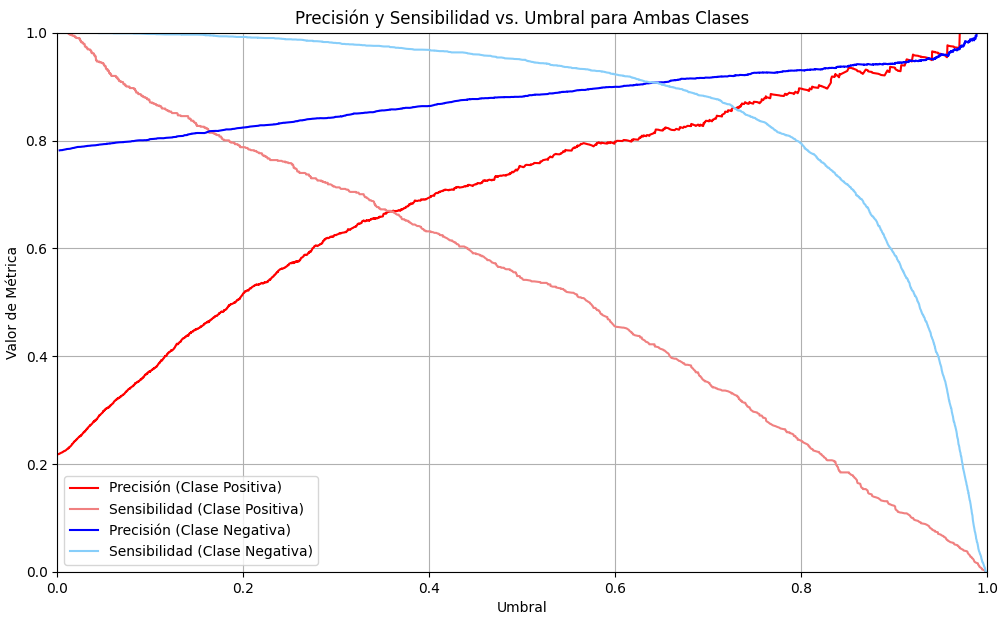

# 9.- Conjunto de validacion

 Consecuencias de no tener conjunto de validaci√≥n:
1. Sobreajuste al conjunto de prueba
El modelo aprende patrones espec√≠ficos del test set (incluyendo ruido).

Se vuelve bueno solo en ese conjunto, pero malo en datos nuevos reales (producci√≥n).

2. M√©tricas enga√±osas
Las m√©tricas de rendimiento (accuracy, F1, etc.) en el test set ya no son confiables.

Parecen m√°s altas de lo que deber√≠an porque el modelo fue ajustado con esa informaci√≥n.

3. Evaluaci√≥n final sesgada
El test set deja de ser una evaluaci√≥n honesta.

No puedes saber realmente cu√°n bien generaliza tu modelo.

4. Comparaciones entre modelos incorrectas
No puedes comparar de forma justa varios modelos o configuraciones.

Cualquier decisi√≥n basada en el test set estar√° contaminada.

5. P√©rdida de capacidad de generalizaci√≥n
El modelo final puede tener alto rendimiento en el test set, pero fallar en producci√≥n.

6. Malas decisiones de negocio o implementaci√≥n
Si implementas un modelo basado en ese test set contaminado, podr√≠as tomar decisiones err√≥neas que afecten resultados reales.



üéØ Objetivo del ejercicio:

El objetivo de este ejercicio es comprender la funci√≥n y utilidad de los subconjuntos de entrenamiento, validaci√≥n y prueba al momento de entrenar y evaluar modelos de machine learning. Deber√°s:

- Realizar la correcta divisi√≥n del dataset.

- Entrenar un modelo de clasificaci√≥n usando solo el conjunto de entrenamiento.

- Usar el conjunto de validaci√≥n para ajustar hiperpar√°metros o evaluar diferentes modelos.

- Utilizar el conjunto de prueba para obtener una evaluaci√≥n final del rendimiento del modelo √≥ptimo seleccionado.

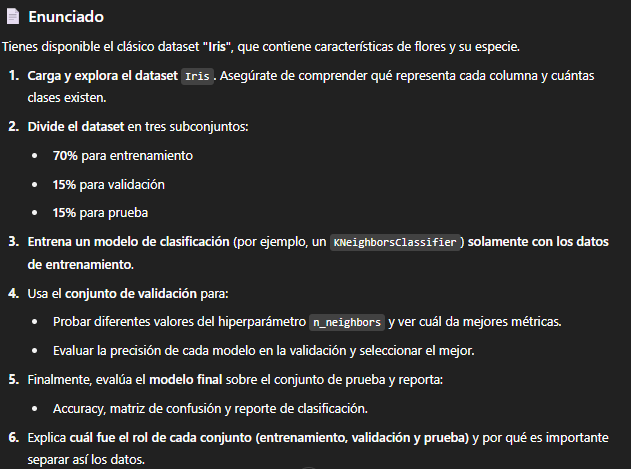

- Entrenamiento: el modelo aprende patrones.

- Validaci√≥n: se ajustan los hiperpar√°metros o se comparan modelos sin tocar los datos de prueba.

- Prueba: evaluaci√≥n final. Nunca se debe usar durante entrenamiento ni ajustes.

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt

# 1. Cargar datos
data = pd.read_csv("df_encoded.csv")
X = data.drop('loan_status', axis=1)
y = data['loan_status']

# 2. Divisi√≥n de datos (70% entrenamiento, 15% validaci√≥n, 15% prueba)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)
#x_temp representa un subconjunto temporal de los datos que se utiliza para dividir posteriormente en validaci√≥n y prueba.

# Verificar tama√±os
print(f"Entrenamiento: {len(X_train)}, Validaci√≥n: {len(X_val)}, Prueba: {len(X_test)}")




Entrenamiento: 22806, Validaci√≥n: 4887, Prueba: 4888


In [3]:
# 3. Entrenar varios modelos con diferentes k usando validaci√≥n
results = []
for k in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    val_preds = model.predict(X_val)
    acc = accuracy_score(y_val, val_preds)
    results.append((k, acc))

# 4. Resultados en validaci√≥n
df_results = pd.DataFrame(results, columns=["k", "validation_accuracy"])
display(df_results)

# Elegir el mejor modelo
best_k = df_results.sort_values(by="validation_accuracy", ascending=False).iloc[0]['k']
print(f"Mejor k encontrado: {int(best_k)}")

# 5. Entrenamiento final y evaluaci√≥n en prueba
final_model = KNeighborsClassifier(n_neighbors=int(best_k))
final_model.fit(X_train, y_train)
test_preds = final_model.predict(X_test)

print("Accuracy en prueba:", accuracy_score(y_test, test_preds))
print("Matriz de confusi√≥n:\n", confusion_matrix(y_test, test_preds))
print("Reporte de clasificaci√≥n:\n", classification_report(y_test, test_preds))

k  validation_accuracy
0   1             0.815838
1   2             0.833231
2   3             0.825046
3   4             0.835482
4   5             0.836096
5   6             0.841211
6   7             0.838961
7   8             0.841211
8   9             0.839984
9  10             0.838756

Mejor k encontrado: 8
Accuracy en prueba: 0.8351063829787234
Matriz de confusi√≥n:
 [[3622  199]
 [ 607  460]]
Reporte de clasificaci√≥n:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90      3821
           1       0.70      0.43      0.53      1067

    accuracy                           0.84      4888
   macro avg       0.78      0.69      0.72      4888
weighted avg       0.82      0.84      0.82      4888



En este ejercicio not√© que entrenar el modelo y evaluarlo en los mismos datos da una idea falsa de su rendimiento. Al usar el conjunto de validaci√≥n, pude comparar versiones del modelo sin afectar la evaluaci√≥n final. El conjunto de prueba me sirvi√≥ para tener una estimaci√≥n realista de c√≥mo se comportar√° mi modelo en datos nuevos.

# 10.- B√∫squeda en cuadr√≠cula

| **Criterio**                 | **Grid Search**                                                                      | **Random Search**                                                                 |
| ---------------------------- | ------------------------------------------------------------------------------------ | --------------------------------------------------------------------------------- |
| **Descripci√≥n**              | Explora todas las combinaciones posibles de un conjunto definido de hiperpar√°metros. | Muestra combinaciones aleatorias de los hiperpar√°metros definidos.                |
| **Uso t√≠pico en algoritmos** | SVM, Ridge, Lasso, √Årboles peque√±os, KNN                                             | Random Forest, Gradient Boosting (XGBoost, LightGBM), Redes Neuronales, etc.      |
| **Eficiencia computacional** | Lenta cuando hay muchos hiperpar√°metros o combinaciones posibles                     | M√°s eficiente al explorar un espacio amplio con menos combinaciones               |
| **Cobertura del espacio**    | Exhaustiva dentro de un rango limitado                                               | Aleatoria; puede cubrir mejor el espacio si algunas variables son m√°s sensibles   |
| **Escenarios recomendados**  | Cuando el espacio de b√∫squeda es peque√±o o bien definido                             | Cuando hay muchos hiperpar√°metros o combinaciones posibles                        |
| **Par√°metros continuos**     | Poco eficiente: requiere discretizarlos                                              | Muy √∫til: permite muestreo continuo                                               |
| **Ventajas**                 | - Prueba todas las combinaciones<br>- Resultados reproducibles                       | - M√°s r√°pido<br>- Puede encontrar buenas combinaciones m√°s r√°pido                 |
| **Desventajas**              | - Costoso computacionalmente<br>- No escala bien                                     | - Resultados no reproducibles sin semilla<br>- Puede ignorar buenas combinaciones |
| **Soporte en librer√≠as**     | `GridSearchCV` (sklearn), `GridSearch` (Keras Tuner)                                 | `RandomizedSearchCV` (sklearn), `RandomSearch` (Keras Tuner)                      |


#### Metodologia para aplicar b√∫squeda en cuadr√≠cula

Aqu√≠ hay una metodolog√≠a para aplicar grid search;

https://chatgpt.com/share/6887d965-c530-800a-9331-f31a77e1f7b1

Ejercicio 1

üìù Enunciado:

Cuentas con un dataset procesado (df_encoded.csv) que contiene informaci√≥n sobre solicitudes de pr√©stamos, y una variable objetivo llamada loan_status que indica si el pr√©stamo fue pagado o no.

El objetivo de este ejercicio es aplicar b√∫squeda en cuadr√≠cula (GridSearchCV) para encontrar la mejor combinaci√≥n de hiperpar√°metros para un modelo de regresi√≥n log√≠stica, optimizando la m√©trica de precisi√≥n.

üéØ Actividades:

1. Carga el dataset y separa las variables predictoras X y la variable objetivo y.

2. Divide los datos en conjunto de entrenamiento y prueba (80% - 20%).

3. Aplica b√∫squeda en cuadr√≠cula con GridSearchCV usando un modelo de regresi√≥n log√≠stica (LogisticRegression).

4. Define una grilla de hiperpar√°metros que explore los siguientes valores:

    - penalty: ['l1', 'l2']

    - C: [0.01, 0.1, 1, 10]

    - solver: ['liblinear'] (usa este solver para que funcione con L1 y L2)

5. Reporta:

    - La mejor combinaci√≥n de hiperpar√°metros

    - La precisi√≥n obtenida en el conjunto de prueba con ese mejor modelo 

    üì¶ Entregables esperados:

    C√≥digo con el proceso completo

    Impresi√≥n de los mejores hiperpar√°metros

    Precisi√≥n en el conjunto de prueba usando el mejor estimador

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Cargar datos
data = pd.read_csv("df_encoded.csv")
X = data.drop('loan_status', axis=1)
y = data['loan_status']

# 2. Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Definir el modelo base
logreg = LogisticRegression(max_iter=1000)

# 4. Definir la grilla de hiperpar√°metros
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear']
}

# 5. Aplicar b√∫squeda en cuadr√≠cula
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 6. Resultados
print("Mejores hiperpar√°metros encontrados:", grid_search.best_params_)

# 7. Evaluaci√≥n en test
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Precisi√≥n en el conjunto de prueba:", test_accuracy)




Mejores hiperpar√°metros encontrados: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Precisi√≥n en el conjunto de prueba: 0.8620530919134571


Qu√© hace c a la regresion logistica?

C es el inverso de la fuerza de regularizaci√≥n:

$C = 1/Œª$

Œª es el par√°metro de regularizaci√≥n (como en Ridge o Lasso).

| Valor de `C` | Regularizaci√≥n | Efecto en el modelo                                                     |
| ------------ | -------------- | ----------------------------------------------------------------------- |
| **Grande**   | D√©bil (poca)   | El modelo intenta ajustarse m√°s a los datos (riesgo de **overfitting**) |
| **Peque√±o**  | Fuerte         | El modelo es m√°s simple (riesgo de **underfitting**)                    |


# 11.- Busqueda aleatoria

# 12.- KNN

# 13.- Selecci√≥n de caracter√≠sticas 

# 14.- Pipeline

‚úÖ ¬øQu√© es un pipeline en ciencia de datos?
Un pipeline automatiza y organiza el flujo de trabajo completo, desde la recolecci√≥n de datos hasta la generaci√≥n de resultados, permitiendo:

- Reproducibilidad

- Escalabilidad

- Mantenimiento m√°s sencillo

- Automatizaci√≥n de tareas repetitivas


üîÑ Etapas comunes en un pipeline de ciencia de datos

1. Ingesta de datos

Recolectar datos desde bases de datos, archivos, APIs, sensores, etc.

2. Limpieza de datos

Eliminar valores nulos, duplicados, outliers, etc.

3. Transformaci√≥n / ingenier√≠a de caracter√≠sticas

Codificaci√≥n, normalizaci√≥n, extracci√≥n de variables, agregaciones

4. An√°lisis exploratorio (EDA)

Estad√≠sticas descriptivas, visualizaciones

5. Entrenamiento de modelos

Algoritmos de machine learning, selecci√≥n de modelos, validaci√≥n

6. Evaluaci√≥n

M√©tricas como accuracy, RMSE, AUC, etc.

7. Despliegue

Modelo en producci√≥n (API, aplicaci√≥n web, etc.)

8. Monitoreo

Validaci√≥n continua del rendimiento del modelo


In [ ]:
# Ingesta de datos
import pandas as pd

# Cargar datos desde archivo CSV
df = pd.read_csv('credit_risk_dataset.csv')

# Mostrar las primeras filas
df.head()


#--------------------------------------

# Limpieza de datos
# Verificar valores nulos
print(df.isnull().sum())

# Eliminar columnas con muchos valores nulos si existen (opcional)
# df.drop(['columna_con_muchos_nulos'], axis=1, inplace=True)

# Rellenar o eliminar valores nulos
df = df.dropna()  # alternativa: df.fillna(method='ffill')

# Eliminar duplicados
df = df.drop_duplicates()

# Detecci√≥n y tratamiento de outliers con z-score (opcional)
from scipy.stats import zscore
import numpy as np

z_scores = np.abs(zscore(df.select_dtypes(include=[np.number])))
df = df[(z_scores < 3).all(axis=1)]

# Verificar forma del dataframe limpio
df.shape


#--------------------------------------

# Transformaci√≥n / Ingenier√≠a de caracter√≠sticas
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Codificaci√≥n de variables categ√≥ricas
categorical_cols = df.select_dtypes(include=['object']).columns

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Normalizaci√≥n de variables num√©ricas
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=['float64', 'int64']).drop('loan_status', axis=1).columns

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Separar caracter√≠sticas (X) y variable objetivo (y)
X = df.drop('loan_status', axis=1)
y = df['loan_status']


#--------------------------------------

#An√°lisis exploratorio de datos (EDA)

import seaborn as sns
import matplotlib.pyplot as plt

# Distribuci√≥n de la variable objetivo
sns.countplot(x=y)
plt.title("Distribuci√≥n de loan_status")
plt.show()

# Correlaci√≥n entre variables
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matriz de Correlaci√≥n")
plt.show()

# Boxplots para detectar outliers
for col in numeric_cols[:5]:  # limitar a 5 columnas para no sobrecargar
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")
    plt.show()


#--------------------------------------

#Entrenamiento de modelos
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Divisi√≥n de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo (puedes cambiar por otros modelos)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)



#-----------------------------------------


# Evaluaci√≥n del modelo

from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

# Predicciones
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# M√©tricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Matriz de confusi√≥n
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusi√≥n")
plt.show()


#-----------------------------------------

# despliegue

# Guarda el modelo entrenado
import joblib
joblib.dump(model, 'modelo_credit_risk.pkl')
joblib.dump(scaler, 'scaler.pkl')

# C√≥digo b√°sico de API con Flask
from flask import Flask, request, jsonify

app = Flask(__name__)
model = joblib.load('modelo_credit_risk.pkl')
scaler = joblib.load('scaler.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    X_input = pd.DataFrame([data])
    X_input[numeric_cols] = scaler.transform(X_input[numeric_cols])
    prediction = model.predict(X_input)[0]
    return jsonify({'loan_status': int(prediction)})

# Ejecutar: flask run


#-------------------------------------
#momitoreo

# Ejemplo b√°sico: guardar m√©tricas de predicci√≥n peri√≥dicamente
import datetime

def log_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)
    timestamp = datetime.datetime.now().isoformat()
    
    with open("model_metrics.log", "a") as f:
        f.write(f"{timestamp}, accuracy: {acc:.4f}, auc: {auc:.4f}\n")

# Llamar luego de cada lote de predicci√≥n
log_metrics(y_test, y_pred)


# 15.- Evaluar m√∫ltiples modelos